<a href="https://colab.research.google.com/github/cpenalozaj/Equipo35_MLOps/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip3 install -U ucimlrepo

**Dataset Information**

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In [22]:
# Cargando las librerías
import os
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import seaborn as sns

#from google.colab import drive # Se utiliza para conectarse con drive y leer los archivos del mismo

In [23]:
# Montamos el drive, para poder acceder al archivo del dataset
#drive.mount('/content/drive')

In [24]:
# Definimos el folder donde se encuentran los datos
#data_folder =

In [25]:
# Importamos el dataset
student_data = fetch_ucirepo(name='Student Performance')

In [26]:
student_data

{'data': {'ids': None,
  'features':     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
  0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
  1       GP   F   17       U     GT3       T     1     1   at_home     other   
  2       GP   F   15       U     LE3       T     1     1   at_home     other   
  3       GP   F   15       U     GT3       T     4     2    health  services   
  4       GP   F   16       U     GT3       T     3     3     other     other   
  ..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
  644     MS   F   19       R     GT3       T     2     3  services     other   
  645     MS   F   18       U     LE3       T     3     1   teacher  services   
  646     MS   F   18       U     GT3       T     1     1     other     other   
  647     MS   M   17       U     LE3       T     3     1  services  services   
  648     MS   M   18       R     LE3       T     3     2  services     ot

In [27]:
# Data (as pandas dataframes)
X = student_data.data.features
y = student_data.data.targets

In [28]:
print(X.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  

[5 rows x 30 columns]


In [29]:
print(y.head())

   G1  G2  G3
0   0  11  11
1   9  11  11
2  12  13  12
3  14  14  14
4  11  13  13


In [30]:
# Revisamos la metadata
print(student_data.metadata)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [31]:
# Revisamos la information de las variables
print(student_data.variables)

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

In [32]:
# Concatenamos ambos datasets (feature y target)
student_data_df = pd.concat([X, y], axis = 1)
student_data_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [33]:
# Generamos la ruta en donde se almacenará
# directory = r'D:\ITESM\MNA-MLOps-Main\MLOps-private\data\raw'
directory = 'Equipo35_MLOps\data\raw'
file_path = os.path.join(directory, 'student_data_df.csv')

os.makedirs(directory, exist_ok=True)

In [34]:
#  Guardamos el dataset completo
student_data_df.to_csv(file_path, index=False)

In [35]:
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [36]:
student_data_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [37]:
student_data_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# **Verificación de valores erróneos y nulos**

In [38]:
#Verificamos valores erróneos
student_data_df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [39]:
#Verificamos valores nulos
student_data_df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


Se logró identificar que no se presentan valores erróneos ni nulos

# **Análisis univariante**

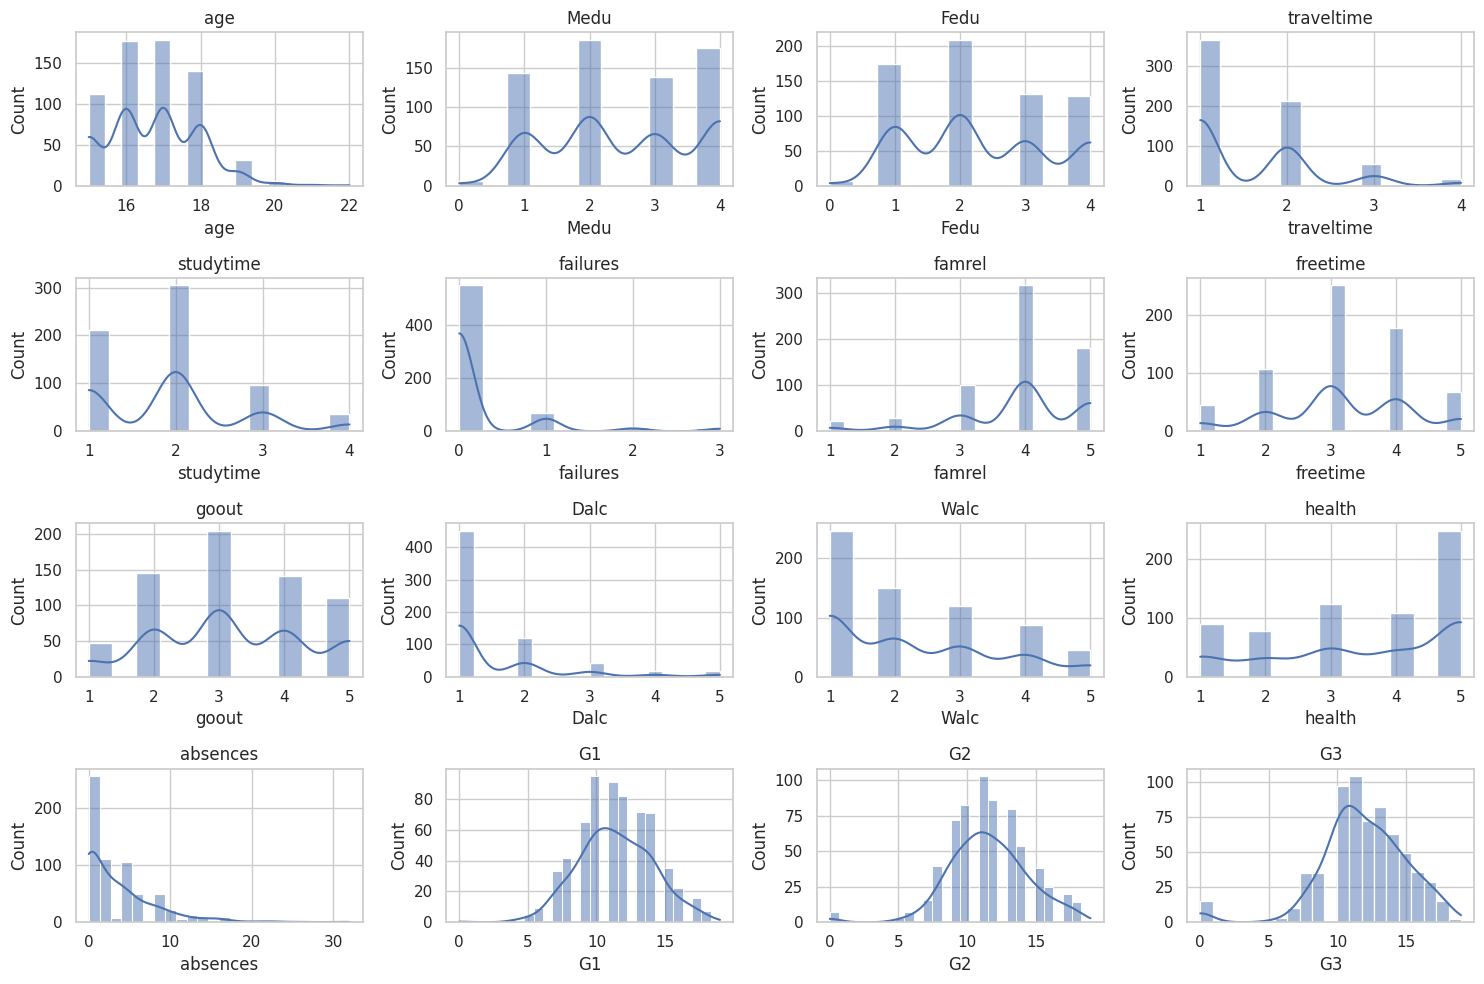

In [40]:
sns.set(style="whitegrid")

# Seleccionamos las columnas con variables numéricas para las gráficas de distribución
#numerical_cols = student_data_df.select_dtypes(include=['number']).columns
numerical_cols = student_data_df.select_dtypes(include=['int64']).columns

# Procedemos a graficar las distribuciones de las variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(student_data_df[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

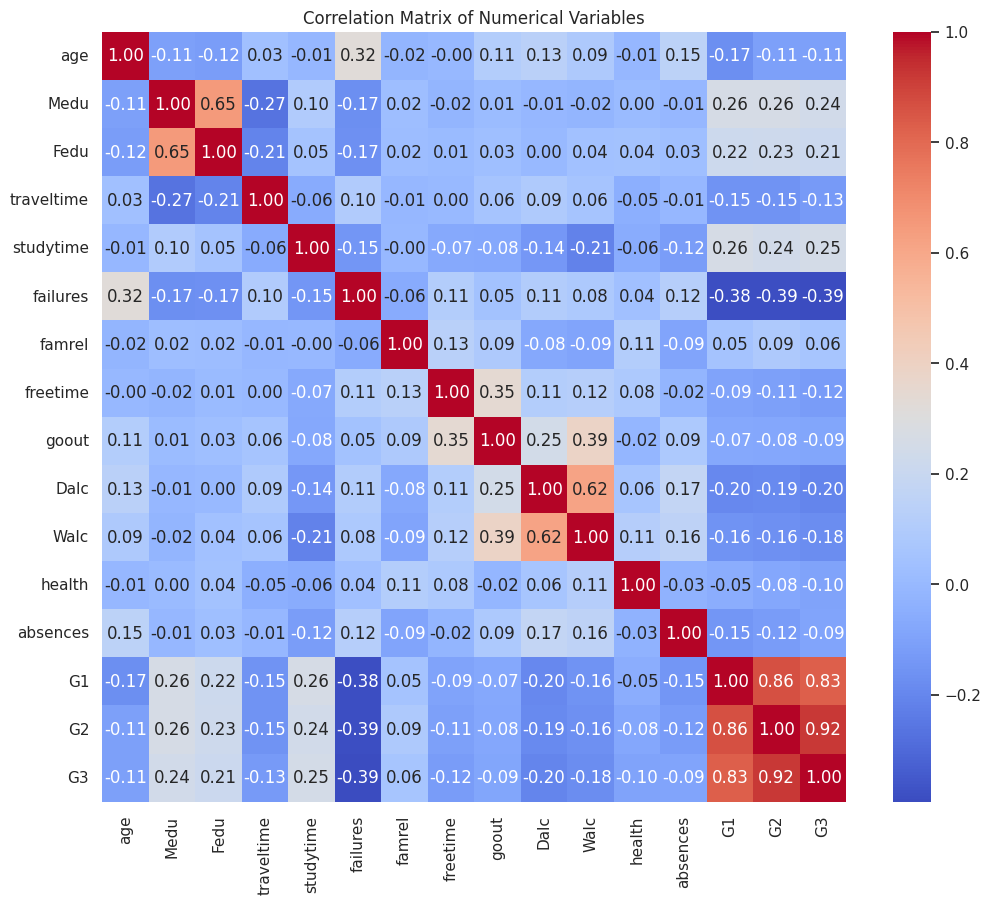

In [44]:
# Con las variables numéricas se procede a realizar la matriz de correlación

# Se calcula la matriz de correlación
correlation_matrix = student_data_df[numerical_cols].corr()

# Aquí se dibuja para mejor interpretación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# **Variables categóricas**

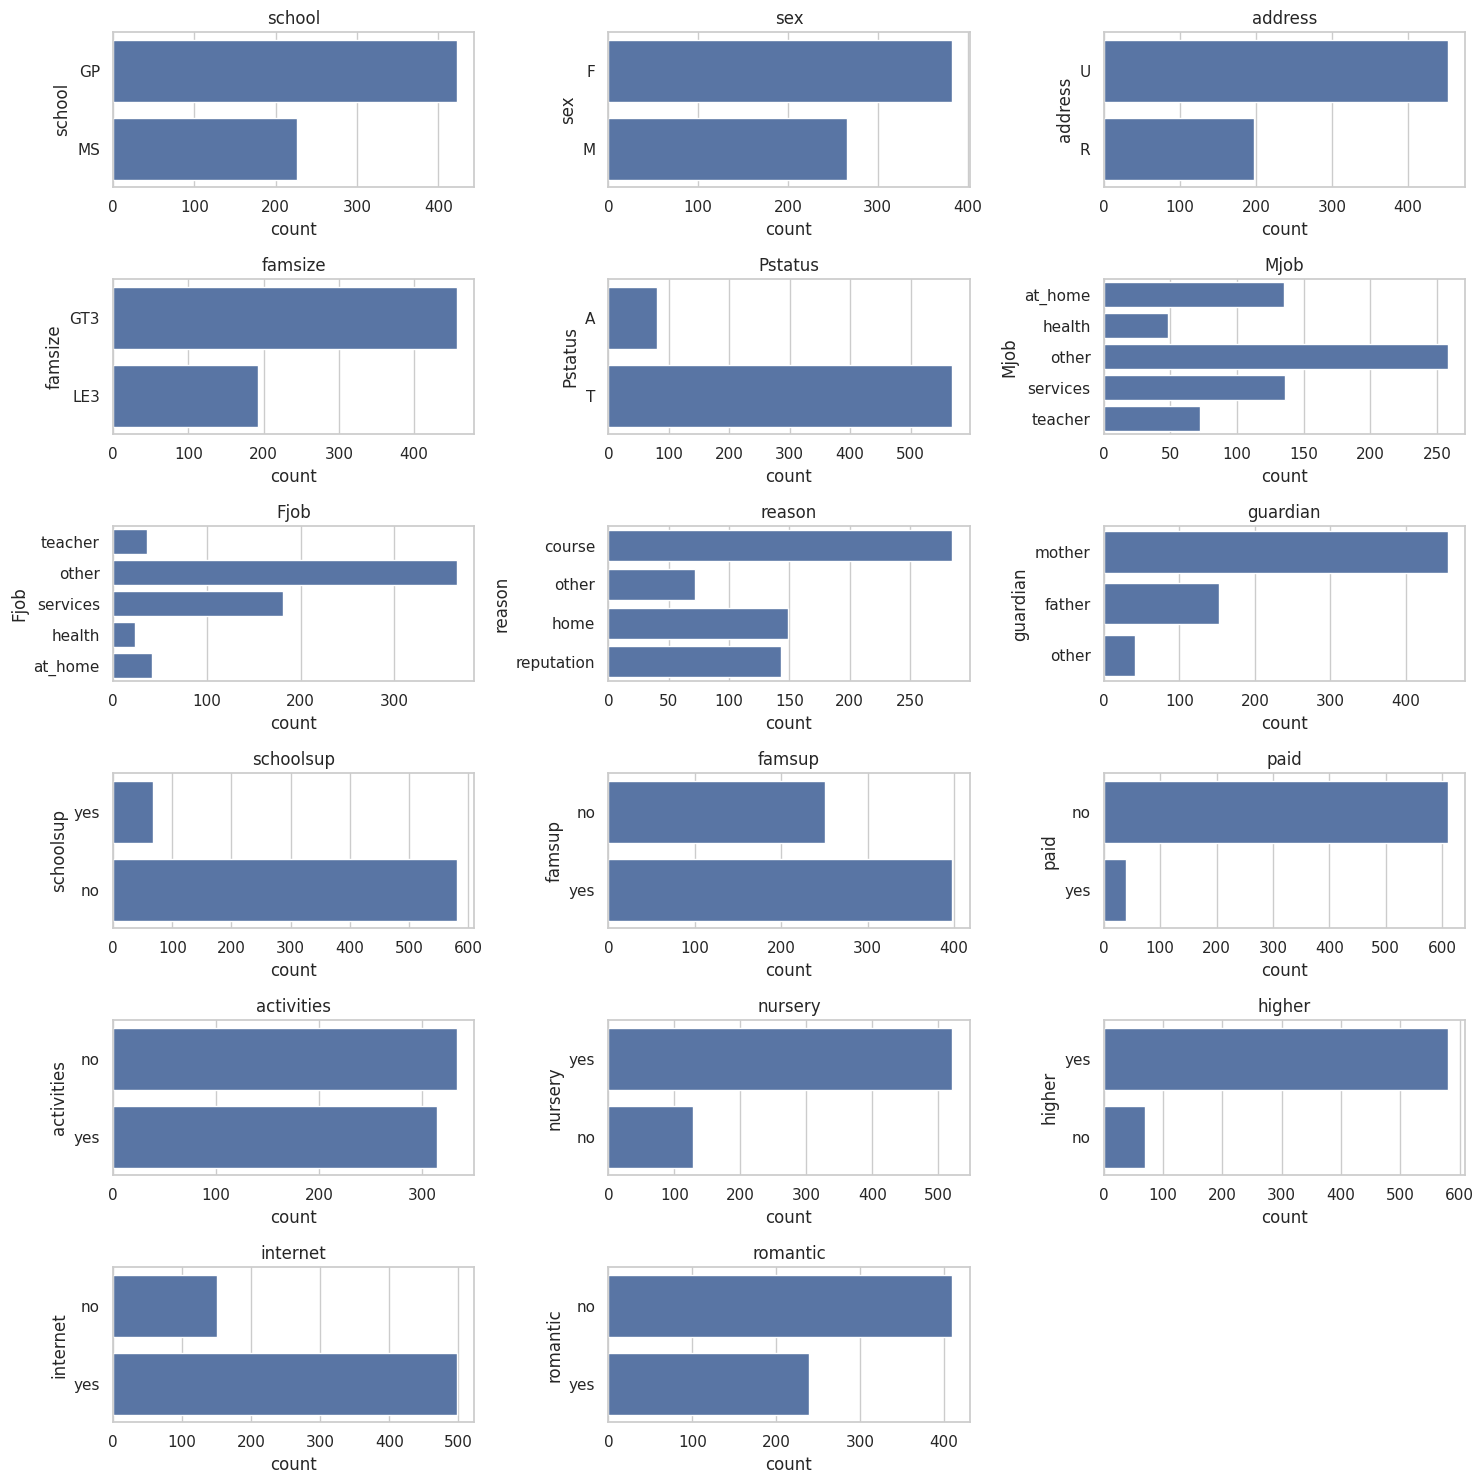

In [45]:
# Seleccionamos las columnas con variables categóricas para las gráficas de distribución
categorical_cols = student_data_df.select_dtypes(include=['object']).columns

# Procedemos a graficar las distribuciones de las variables categóricas
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(y=student_data_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()